### TIME SERIES ANALYSIS

### Import the Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing the Data

In [ ]:
!wget -O Final_Total_Dataframe_Stats.csv "https://raw.githubusercontent.com/SayakKDutta1/MSEPROJECT/main/Final_Total_Dataframe_Stats.csv"
#https://www.eia.gov/electricity/data/state/
#it gets updated every month in website we have taken till 2021-01-01

--2024-01-28 21:51:37--  https://raw.githubusercontent.com/SayakKDutta1/MSEPROJECT/main/Final_Total_Dataframe_Stats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3578580 (3.4M) [text/plain]
Saving to: ‘Final_Total_Dataframe_Stats.csv’

Final_Total_Datafra 100%[===================>]   3.41M  --.-KB/s    in 0.02s   

2024-01-28 21:51:37 (194 MB/s) - ‘Final_Total_Dataframe_Stats.csv’ saved [3578580/3578580]



In [ ]:
df_comp = pd.read_csv('Final_Total_Dataframe_Stats.csv')

### Examining the Data

In [ ]:
df_comp.head()

,Unnamed: 0,State,RESIDENTIAL (Revenue),RESIDENTIAL (Sales),RESIDENTIAL (Customers),RESIDENTIAL (Price),COMMERICIAL (Revenue),COMMERICIAL (Sales),COMMERICIAL (Customers),COMMERICIAL (Price),...,TRANSPORTATION (Revenue),TRANSPORTATION (Sales),TRANSPORTATION (Customers),TRANSPORTATION (Price),TOTAL (Revenue),TOTAL (Sales),TOTAL (Customers),TOTAL (Price),Date,STATE_NAME
0,0,AK,"36,139","2,22,134","2,70,456",16.27,"36,037","2,56,270","47,334",14.06,...,0,0,0,0,"87,685","5,94,006","3,19,030",14.76,2009-12-01,Alaska
1,1,AL,"2,76,749","28,18,685","21,32,487",9.82,"1,66,408","16,79,995","3,51,480",9.91,...,0,0,0,0,"6,03,260","69,64,800","24,93,148",8.66,2009-12-01,Alabama
2,2,AR,"1,25,142","14,48,385","13,17,936",8.64,"67,431","8,89,269","1,78,058",7.58,...,4,39,2,10.26,"2,68,283","36,21,183","15,25,714",7.41,2009-12-01,Arkansas
3,3,AZ,"2,21,494","22,84,523","25,63,532",9.70,"1,85,595","21,56,813","2,99,584",8.61,...,0,0,0,0,"4,62,196","53,41,392","28,70,201",8.65,2009-12-01,Arizona
4,4,CA,"11,87,506","80,64,319","1,33,52,574",14.73,"11,34,995","1,00,31,863","18,58,683",11.31,...,"5,614","68,156",495,8.24,"26,79,317","2,19,42,679","1,52,86,390",12.21,2009-12-01,California


In [ ]:
df=df_comp

In [ ]:
numeric_columns = df_comp.columns.difference(['State','STATE_NAME', 'Date'])


df[numeric_columns] = df[numeric_columns].replace({',': '', '\.': '', ' ': ''}, regex=True)
df[numeric_columns] = df[numeric_columns].replace('', np.nan).astype(float)

# Create the 'Unit Generated' column
df['Unit_Generated'] = df['TOTAL (Sales)'] / df['TOTAL (Price)']


In [ ]:
df['Unit_Generated']=df['Unit_Generated'].round(2)
df.head(2)

,Unnamed: 0,State,RESIDENTIAL (Revenue),RESIDENTIAL (Sales),RESIDENTIAL (Customers),RESIDENTIAL (Price),COMMERICIAL (Revenue),COMMERICIAL (Sales),COMMERICIAL (Customers),COMMERICIAL (Price),...,TRANSPORTATION (Sales),TRANSPORTATION (Customers),TRANSPORTATION (Price),TOTAL (Revenue),TOTAL (Sales),TOTAL (Customers),TOTAL (Price),Date,STATE_NAME,Unit_Generated
0,0.0,AK,36139.0,222134.0,270456.0,16.27,36037.0,256270.0,47334.0,1406.0,...,0.0,0.0,0.0,87685.0,594006.0,319030.0,14.76,2009-12-01,Alaska,40244.31
1,1.0,AL,276749.0,2818685.0,2132487.0,9.82,166408.0,1679995.0,351480.0,991.0,...,0.0,0.0,0.0,603260.0,6964800.0,2493148.0,8.66,2009-12-01,Alabama,804249.42


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df1 = df.groupby(['Date'])['Unit_Generated'].sum().reset_index()

In [ ]:
df1.head(2)

,Date,Unit_Generated
0,1990-01-01,40273223.12
1,1990-02-01,35604480.01


In [ ]:
df_comp=df1

In [ ]:
df_comp.tail()

,Date,Unit_Generated
397,2023-02-01,24326125.60
398,2023-03-01,26158961.64
399,2023-04-01,24527816.58
400,2023-05-01,25865898.53
401,2023-06-01,27213978.52


In [ ]:
df_comp.describe()

,Unit_Generated
count,4.020000e+02
mean,3.604989e+07
std,5.223565e+06
min,2.432613e+07
25%,3.187024e+07
50%,3.575793e+07
75%,4.006299e+07
max,4.868001e+07


In [ ]:
df_comp.isna()

,Date,Unit_Generated
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
397,False,False
398,False,False
399,False,False
400,False,False


In [ ]:
df_comp.isna().sum()

Date              0
Unit_Generated    0
dtype: int64

### Plotting the Data

In [ ]:
import matplotlib.pyplot as plt

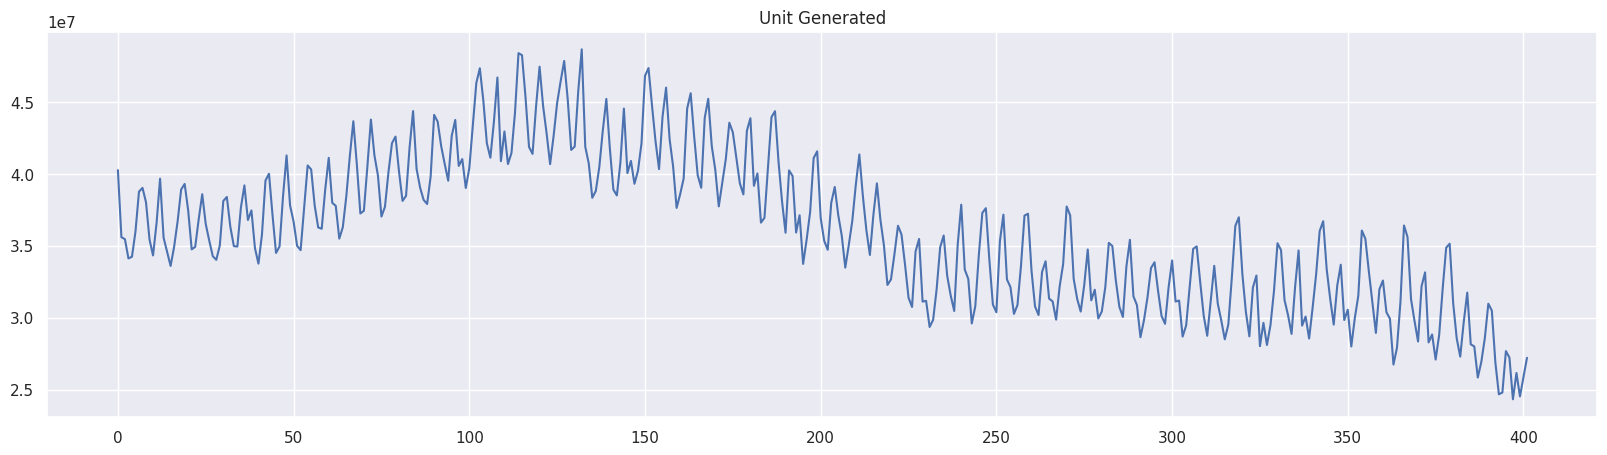

In [ ]:
df_comp.Unit_Generated.plot(figsize=(20,5), title = "Unit Generated")
plt.show()

### The QQ Plot

In [ ]:
import scipy.stats
import pylab

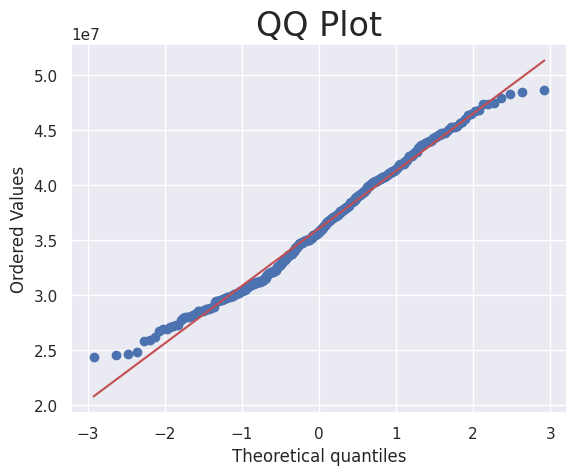

In [ ]:
scipy.stats.probplot(df_comp.Unit_Generated, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

Normally distributed

In [ ]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)

In [ ]:
df_comp.Date.describe()

count                     402
unique                    402
top       1990-01-01 00:00:00
freq                        1
first     1990-01-01 00:00:00
last      2023-06-01 00:00:00
Name: Date, dtype: object

In [ ]:
df=df_comp

In [ ]:
df.rename(columns={'Date': 'date'}, inplace=True)

In [ ]:
df_comp.set_index("date")

,Unit_Generated
date,
1990-01-01,40273223.12
1990-02-01,35604480.01
1990-03-01,35469737.05
1990-04-01,34127677.04
1990-05-01,34243910.10
...,...
2023-02-01,24326125.60
2023-03-01,26158961.64
2023-04-01,24527816.58


In [ ]:
df_comp.set_index("date", inplace=True)

In [ ]:
df_comp.head()

,Unit_Generated
date,
1990-01-01,40273223.12
1990-02-01,35604480.01
1990-03-01,35469737.05
1990-04-01,34127677.04
1990-05-01,34243910.10


In [ ]:
df_copy = df_comp.copy()

In [ ]:
df_comp = df_copy.copy()

In [ ]:
df_copy.head(2)

,Unit_Generated
date,
1990-01-01,40273223.12
1990-02-01,35604480.01


In [ ]:
df_comp.head(2)

,Unit_Generated
date,
1990-01-01,40273223.12
1990-02-01,35604480.01


In [ ]:
df_comp = df_comp.resample('M').last()

In [ ]:
df_comp=df_comp.asfreq('m')

In [ ]:
df_comp.head(5)

,Unit_Generated
date,
1990-01-31,40273223.12
1990-02-28,35604480.01
1990-03-31,35469737.05
1990-04-30,34127677.04
1990-05-31,34243910.10


In [ ]:
df_comp.isnull().sum()

Unit_Generated    0
dtype: int64

In [ ]:
df_comp.count()

Unit_Generated    402
dtype: int64

Splitting the data

In [ ]:
size = int(len(df_comp)*0.8)

In [ ]:
df = df_comp.iloc[:size]

In [ ]:
df_test = df_comp.iloc[size:]

In [ ]:
df.tail()

,Unit_Generated
date,
2016-05-31,29522744.59
2016-06-30,32784764.64
2016-07-31,36393779.73
2016-08-31,36990679.12
2016-09-30,33055151.89


In [ ]:
df_test.head(2)

,Unit_Generated
date,
2016-10-31,30406465.27
2016-11-30,28706663.98


In [ ]:
wn = np.random.normal(loc = df.Unit_Generated.mean(), scale = df.Unit_Generated.std(), size = len(df))

In [ ]:
df['wn'] = wn

In [ ]:
df.head(2)

,Unit_Generated,wn
date,,
1990-01-31,40273223.12,3.154762e+07
1990-02-28,35604480.01,4.154373e+07


In [ ]:
df.describe()

,Unit_Generated,wn
count,3.210000e+02,3.210000e+02
mean,3.749257e+07,3.790351e+07
std,4.643390e+06,4.727074e+06
min,2.850015e+07,2.404413e+07
25%,3.403092e+07,3.458784e+07
50%,3.744024e+07,3.797642e+07
75%,4.070503e+07,4.101657e+07
max,4.868001e+07,4.947117e+07


Mean of two columns are similar. white noise value are normally distributed around mean of unit generated.

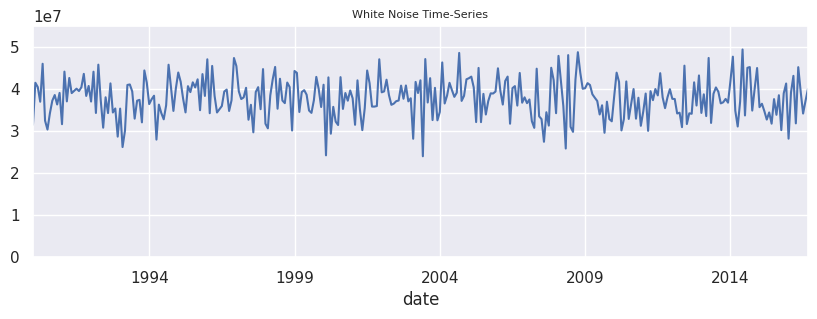

In [ ]:
df.wn.plot(figsize = (10,3))
plt.title("White Noise Time-Series", size= 8)
plt.ylim(0,55000000)
plt.show()

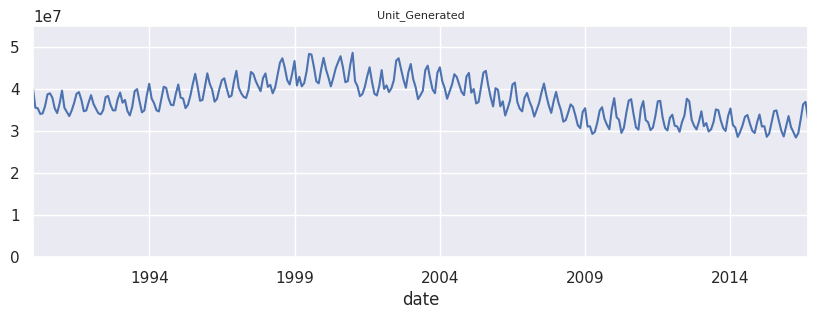

In [ ]:
df.Unit_Generated.plot(figsize=(10,3))
plt.title("Unit_Generated", size = 8)
plt.ylim(0,55000000)
plt.show()

In [ ]:
df_copy12=df.copy()

In [ ]:
len(df)

321

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
sts.adfuller(df.Unit_Generated)

(-0.8763310842321109,
 0.7956669792345497,
 14,
 306,
 {'1%': -3.4519023023726696,
  '5%': -2.8710320399170537,
  '10%': -2.57182745012602},
 9262.947728502695)

Since significant so we do not find evidence of stationarity in dataset. p=0.69 lag=14, autcorrelation in 14 lags, Maximized Info Criteria= 8602.88

In [ ]:
sts.adfuller(df.wn)

(-7.527236784046302,
 3.657333657943976e-11,
 3,
 317,
 {'1%': -3.451148243362826,
  '5%': -2.8707010565250752,
  '10%': -2.571650950153748},
 10176.75099105512)

white noise stationary

##Seasonality

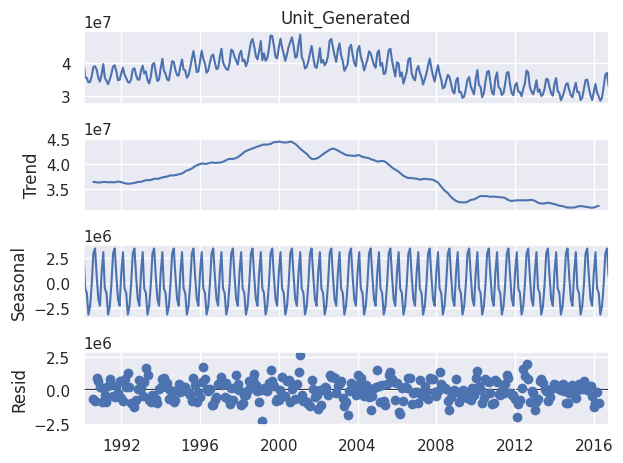

In [ ]:
s_dec_additive = seasonal_decompose(df.Unit_Generated, model = "additive")
s_dec_additive.plot()
plt.show()

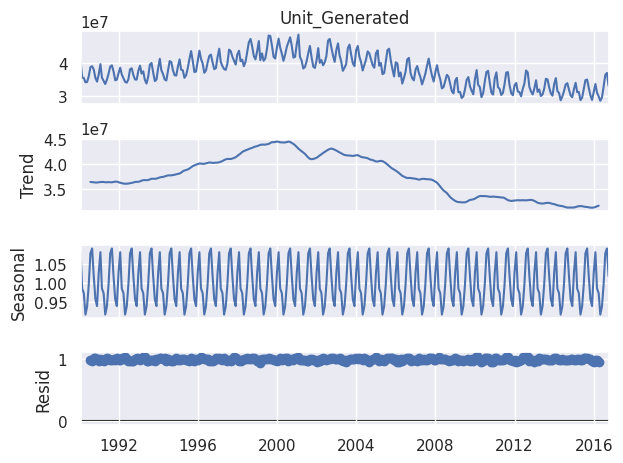

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.Unit_Generated, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

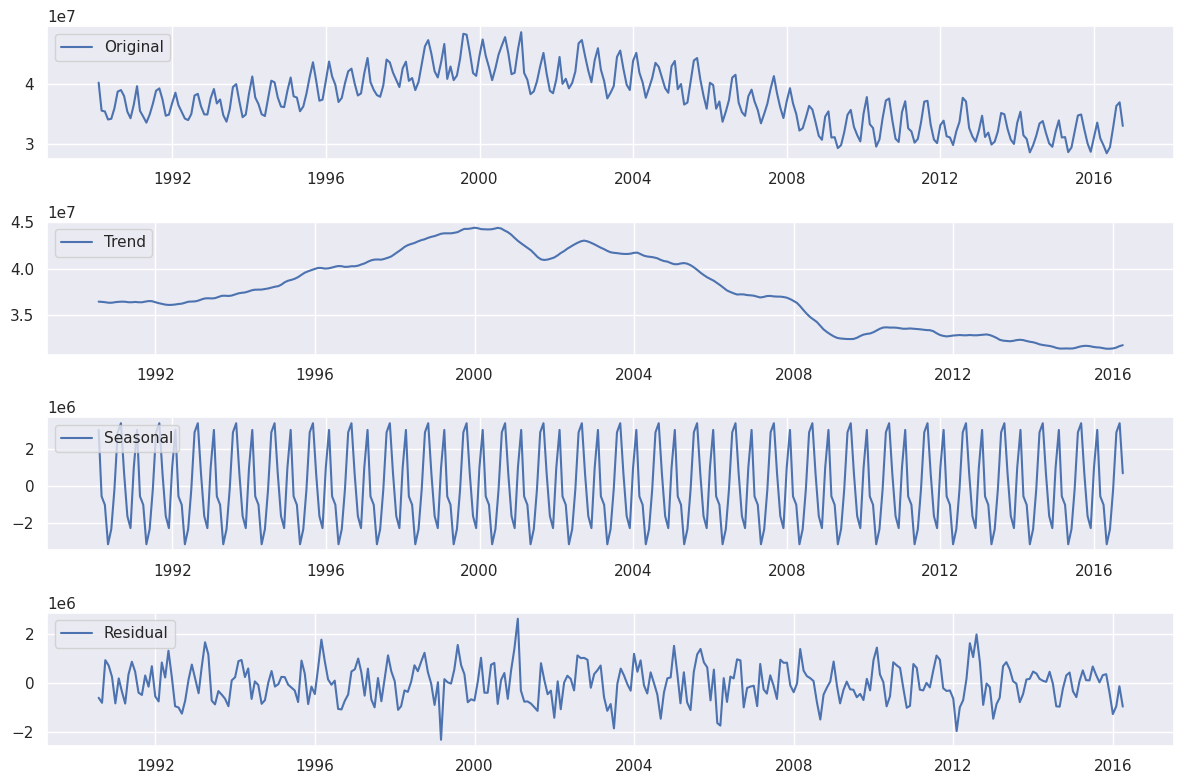

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_period=12
# Assuming 'Date' is your datetime index and 'Value' is your time series column
# Adjust the frequency parameter based on the seasonality of your data
result = seasonal_decompose(df['Unit_Generated'], model='additive', period=seasonal_period)

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Unit_Generated'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
df1=df.copy()

In [ ]:
df=df1.copy()

In [ ]:
df['Differenced'] = df['Unit_Generated'].diff()

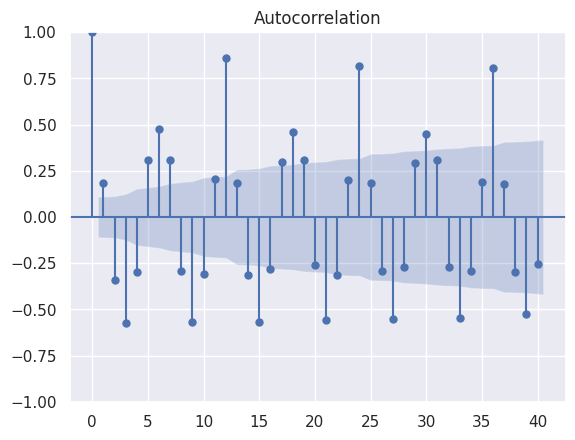

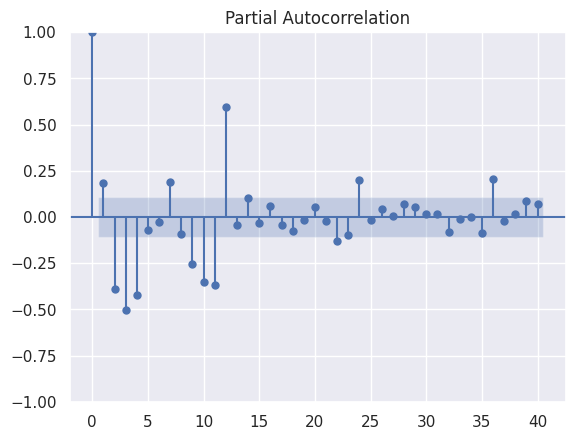

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(df['Differenced'].dropna(), lags=40)
plt.show()

# Plot PACF
plot_pacf(df['Differenced'].dropna(), lags=40)
plt.show()

##Auto Arima

In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [ ]:
pip install pmdarima

In [ ]:
df.head()

,Unit_Generated,wn,Differenced
date,,,
1990-01-31,40273223.12,3.154762e+07,NaN
1990-02-28,35604480.01,4.154373e+07,-4668743.11
1990-03-31,35469737.05,4.051171e+07,-134742.96
1990-04-30,34127677.04,3.703206e+07,-1342060.01
1990-05-31,34243910.10,4.606723e+07,116233.06


In [ ]:
df_diiferenced_wn=df.copy()

In [ ]:
df = df.drop(columns=['Differenced', 'wn'])

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model_auto = auto_arima(df.Unit_Generated, method='bfgs')

In [ ]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  321
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5054.790
Date:                Sun, 28 Jan 2024   AIC                          10123.580
Time:                        21:52:53   BIC                          10149.958
Sample:                    01-31-1990   HQIC                         10134.113
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1008      0.091      1.109      0.268      -0.077       0.279
ar.L2         -0.0378      0.103     -0.367      0.714      -0.240       0.164
ar.L3         -0.8233      0.093     -8.869      0.000      -1.005      -0.641
ma.L1         -0.2154      0.100     -2.145      0.032      -0.412      -0.019
ma.L2         -0.0461      0.120     -0.384      0.701      -0.282       0.189
ma.L3          0.7475      0.105      7.116      0.000       0.542       0.953
sigma2      2.858e+12   7.02e-14   4.07e+25      0.000    2.86e+12    2.86e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.74   Prob(JB):                         0.60
Heteroskedasticity (H):               0.95   Skew:                            -0.13
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+41. Standard errors may be unstable.
"""

In [ ]:
df_test.head(2)

,Unit_Generated
date,
2016-10-31,30406465.27
2016-11-30,28706663.98


In [ ]:
df_test.tail(2)

,Unit_Generated
date,
2023-05-31,25865898.53
2023-06-30,27213978.52


In [ ]:
start_date = pd.to_datetime('2016-10-31')
end_date = pd.to_datetime('2023-06-30')

In [ ]:
prediction_start_date = '2014-11-30'
prediction_end_date = '2021-01-31'

# Generate predictions using the model for the specified date range
df_auto_pred = pd.DataFrame(
    model_auto.predict(n_periods=len(df_test[prediction_start_date:prediction_end_date])),
    index=df_test[prediction_start_date:prediction_end_date].index
)

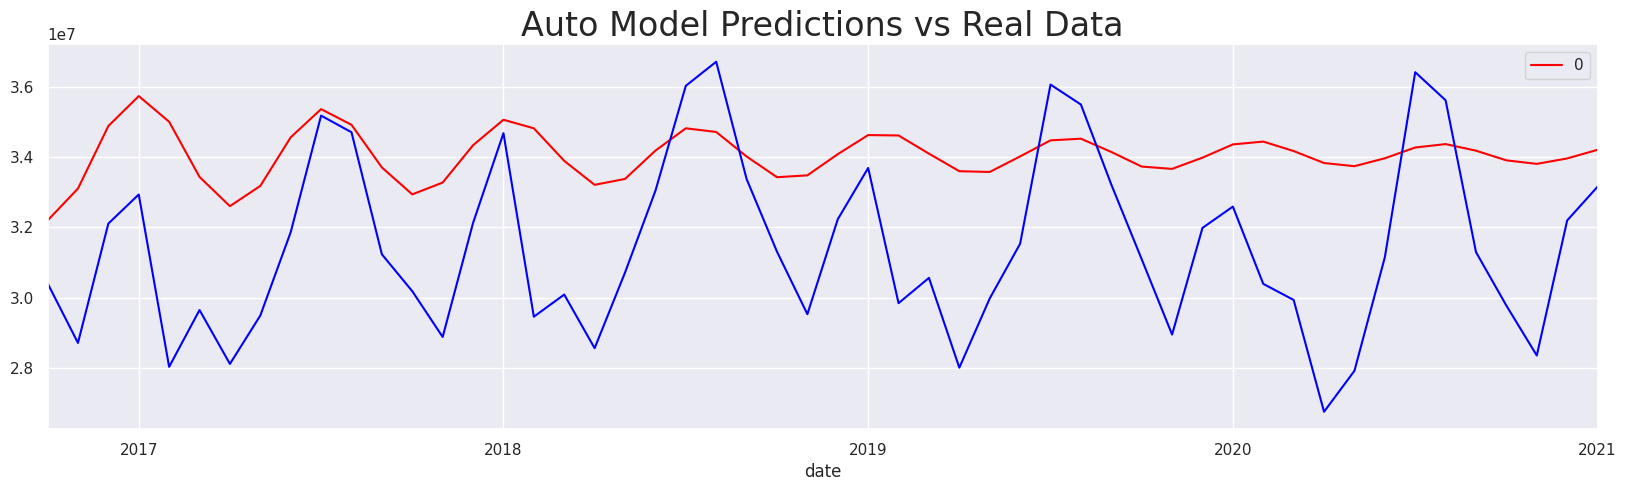

In [ ]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.Unit_Generated[prediction_start_date:prediction_end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")
sns.set()

#SARIMAX

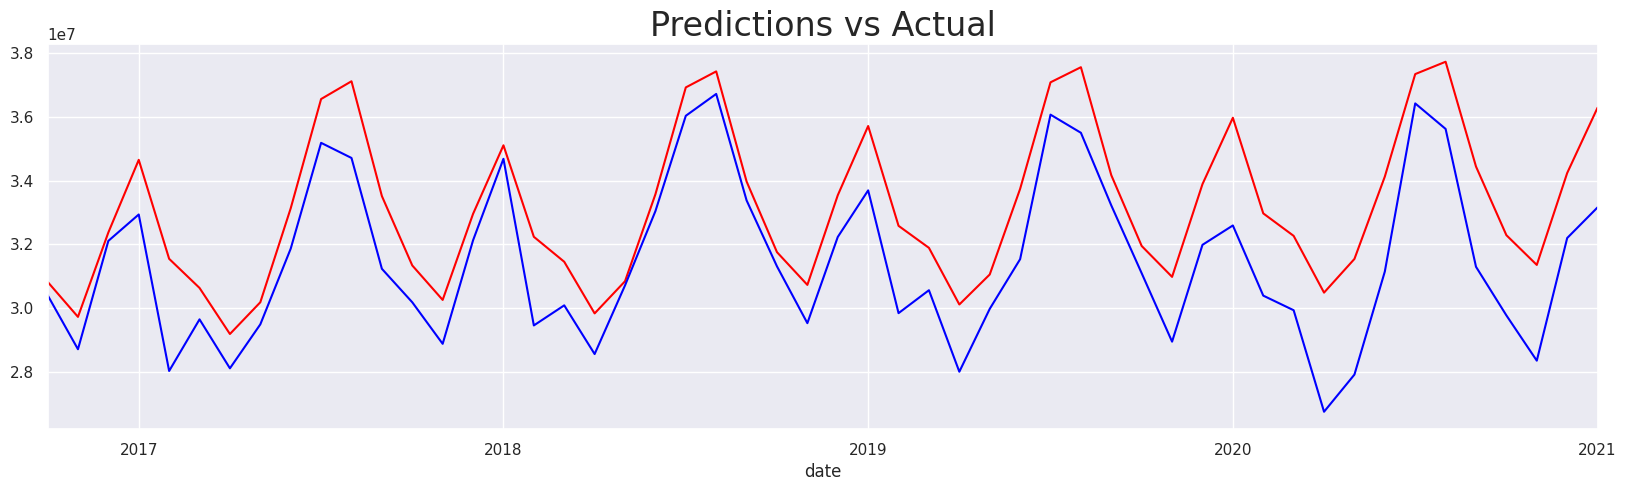

In [ ]:
start_date = '2016-10-31'
end_date = '2021-01-31'
model_ret_sarimax = SARIMA(df.Unit_Generated[1:],
                            order = (3,1,4), seasonal_order = (3,1,2,12))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start=start_date, end=end_date)


df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.Unit_Generated[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()